***Materia: Ciencia y Analítica de Datos***


***Profesor: María de la Paz Rico Fernández***


***RETO 1:  Limpieza, análisis, visualización y kmeans***


***A01793499 Diego Fernando Guerra Burgos***

***A01273800 José Eduardo Arteaga Valdés***


***16 de Noviembre 2022***

In [1]:
#Importamos la librerías que vamos a utilizar para ambos retos
#La mayoría de estas librerías se utilizarán para realizar los modelos de clasificación
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import math 
import matplotlib.pyplot as plt
import requests, zipfile 
from io import BytesIO

from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from google.colab import drive

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import QuantileTransformer 
from sklearn.preprocessing import power_transform 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold

! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 8.8 MB/s 
     |████████████████████████████████| 1.0 MB 54.8 MB/s 
     |████████████████████████████████| 1.7 MB 51.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 47.9 MB/s 
     |████████████████████████████████| 6.3 MB 43.0 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=d3e0f1b3c3c1be2b3ed72e3b3379d716ae20dc5ce28c4c282704a4f214020dcb
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=edf61b529db843a51de44e1c42a5df2206e1dd0006ca8b0eaa4422dcd00ec09c
  Stored in directory: /root/.

In [2]:
import geopandas as gpd
from shapely.geometry import Point

In [3]:
#Para este ejercicio vamos a usar la base de datos de las aguas subterraneas

url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(url)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
df=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin-1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [4]:
#En primer lugar vamos a observar la base de datos
df.describe()

#Recibimos información de las variables numericas, aunque encontramos que SDT_mg/L tiene varios valores NA


,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [5]:
#Veamos el tipo de dato que ofrece nuestra base de datos
df.info()
#varias de las columnas son objetos, en este caso tras observar los datos hacen referencia a variables binarias de Si/No

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [6]:
#Hagamos conteo de nuestros datos faltantes, NA.
df.isnull().sum()

#Como mencionamos en el primer analisis exploratorio, la variable SDT_mg/L muestra 1068 registros con NA (todas las filas son NA)
#Podemos eliminar esta columna
#Las demas columnas muestran valores menores de NA por lo cual podemos emplear imputaciones a estas variables

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [7]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)
#Aqui podemos ver el porcentaje de NA en cada columna con respecto al total de registros, la columna con alta presencia de NA
#Es Contaminanes con 40%, las demas columnas cuentan con NA que representa menos del 1% de los registros.

SDT_mg/L                1.000000
CONTAMINANTES           0.406367
CALIDAD_CONDUC          0.005618
CONDUCT_mS/cm           0.005618
ALC_mg/L                0.003745
CALIDAD_ALC             0.003745
CALIDAD_SDT_ra          0.001873
SDT_M_mg/L              0.001873
CALIDAD_SDT_salin       0.001873
CALIDAD_N_NO3           0.000936
CALIDAD_DUR             0.000936
N_NO3_mg/L              0.000936
DUR_mg/L                0.000936
CUMPLE_CON_COND         0.000000
CUMPLE_CON_ALC          0.000000
SEMAFORO                0.000000
CALIDAD_FE              0.000000
FE_TOT_mg/L             0.000000
CALIDAD_MN              0.000000
CUMPLE_CON_SDT_ra       0.000000
CUMPLE_CON_SDT_salin    0.000000
CLAVE                   0.000000
CUMPLE_CON_FLUO         0.000000
CUMPLE_CON_DUR          0.000000
CALIDAD_PB              0.000000
CUMPLE_CON_CF           0.000000
CUMPLE_CON_NO3          0.000000
CUMPLE_CON_AS           0.000000
CUMPLE_CON_CD           0.000000
CUMPLE_CON_CR           0.000000
CUMPLE_CON

In [8]:
#Antes de empezar la limpieza de la base vamos a eliminar la columna mencionada en una copia de la base
df_clean = df.copy()
df_clean.drop('SDT_mg/L', axis=1, inplace=True)

column_names = df_clean.columns


    #COLUMNAS NUMERICAS
#procedemos a organizar las columnas de acuerdo al tipo de datos
#Vamos a trabajar sobre las columnas numericas
num_columns = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
               'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L',
               'FE_TOT_mg/L']


    #COLUMNAS BINARIAS
#aqui colocaremos las variables binarias
bin_columns = [string for string in column_names if 'CUMPLE' in string]


df_num = df_clean[num_columns]
df_num.head()
#Aqui podemos observar que existen algunas columnas con valores aproximados (con el indicador <), para estos casos
#%%
#Lo que haremos sera dejar estos valores similar al rango minimo al cual estamos observando
#por decir, si el valor es <0,05 lo dejaremos en 0,05
#Convertiremos todos los datos en texto, eliminamos el < y los convertiremos en valores numéricos
for column in num_columns:
    df_clean[column] = df_clean[column].astype('str')
    df_clean[column] = df_clean[column].str.replace('<', '')
    df_clean[column] = df_clean[column].astype('float')

df_clean.isnull().sum()

CLAVE                     0
SITIO                     0
ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
ACUIFERO                  0
SUBTIPO                   0
LONGITUD                  0
LATITUD                   0
PERIODO                   0
ALC_mg/L                  4
CALIDAD_ALC               4
CONDUCT_mS/cm             6
CALIDAD_CONDUC            6
SDT_M_mg/L                2
CALIDAD_SDT_ra            2
CALIDAD_SDT_salin         2
FLUORUROS_mg/L            0
CALIDAD_FLUO              0
DUR_mg/L                  1
CALIDAD_DUR               1
COLI_FEC_NMP/100_mL       0
CALIDAD_COLI_FEC          0
N_NO3_mg/L                1
CALIDAD_N_NO3             1
AS_TOT_mg/L               0
CALIDAD_AS                0
CD_TOT_mg/L               0
CALIDAD_CD                0
CR_TOT_mg/L               0
CALIDAD_CR                0
HG_TOT_mg/L               0
CALIDAD_HG                0
PB_TOT_mg/L               0
CALIDAD_PB                0
MN_TOT_mg/L         

In [9]:

#vamos a utilizar el promedio de cada columna numérica para llenar estos valores.

for column in num_columns:
    df_clean[column].fillna(value = df_clean[column].mean(), inplace = True)

#Una vez limpia la base procedemos a trabajar sobre las variables numéricas
df_num = df_clean[num_columns]
#Hacemos conteo de valores NA
df_num.isnull().sum()
#No contamos con valores NA

ALC_mg/L               0
CONDUCT_mS/cm          0
SDT_M_mg/L             0
FLUORUROS_mg/L         0
DUR_mg/L               0
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

La siguiente sección responde las siguientes preguntas del reto:

 

*   Identificando tendencias centrales promedio, media y mediana de los datos.
*   Identificar medidas de dispersión, máximo, mínimo .
*   Identificar medidas de posición no centrales , los cuartiles , outliers.  
*   Identificar correlaciones.





 




In [10]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.633759,116.655014,26.6400,164.048750,215.825000,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1138.953013,1242.056683,50.4000,505.500000,822.500000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,896.101567,2748.950627,25.0000,337.700000,551.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.2000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.938073,359.500870,20.0000,121.274100,245.662350,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.1000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.319759,8.341222,0.0200,0.650932,2.082916,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1068.0,0.013276,0.154391,0.0050,0.005000,0.005000,0.005000,5.003200


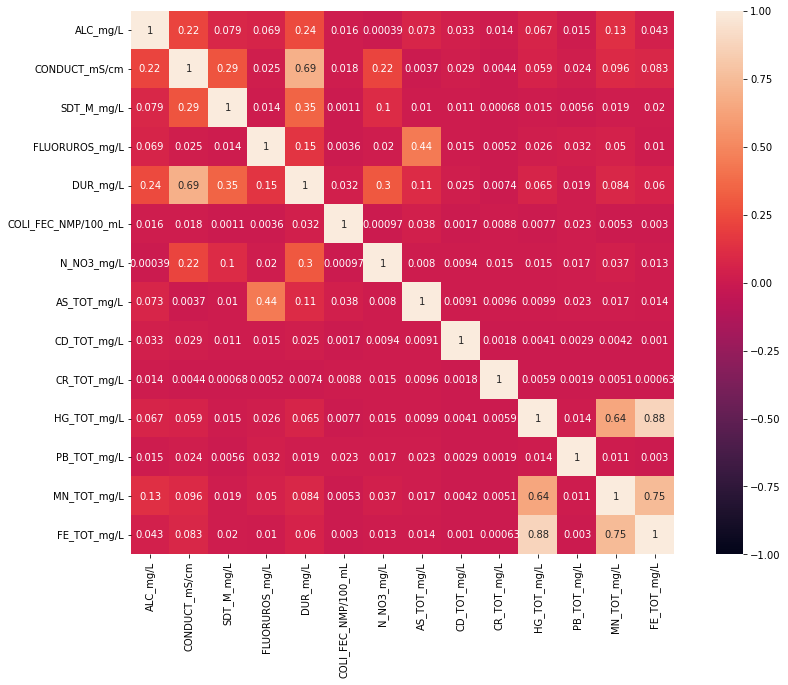

In [11]:
mat_corr = df_num.corr().abs() #Esto lo hacemos para dejar todo en valores absolutos y poder observar mejor las correlaciones
#entre las variables numéricas.
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(mat_corr, vmax = 1, vmin = -1, square = True, annot = True)
plt.show()

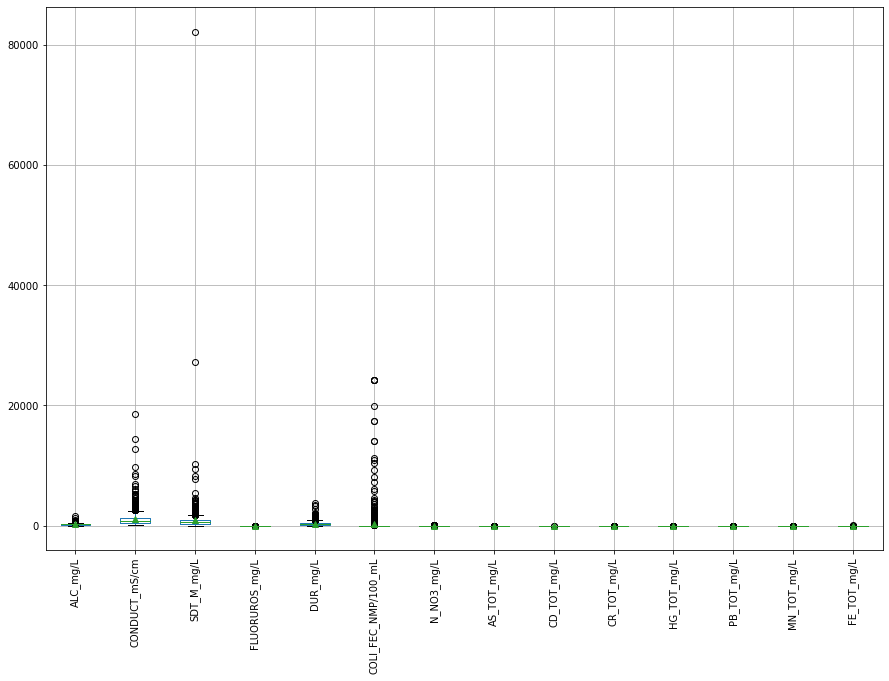

In [12]:
num_plot = df_num.boxplot(figsize=(15,10), showmeans = True)
num_plot.plot()
plt.xticks(rotation=90)
plt.show()

#9 de las 14 variables numéricas muestra la presencia de pocos valores atípicos (outliers).
#Mientras que las demas 6 variables revelan la presencia de varios datos considerados outliers dentro de su propia distribución.

In [13]:
#Vamos a transformar las variables binarias a que reflejen el valor 1 y 0

for column in bin_columns:
    df_clean.loc[df[column] == 'SI', column] = 1
    df_clean.loc[df[column] == 'NO', column] = 0
    df_clean = df_clean[(df_clean[column] == 1) | (df_clean[column] == 0)] #Con esto nos aseguramos que solamente existan valores binarios y los NA se eliminan

#Esto nos ayuda para preparar la base para modelaje, en la segunda parte del reto.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [14]:
#para observar la relación entre la ubicación y la calidad de agua, utilizaremos los datos de:
#Latitud, Longitud y Semaforo (semaforo mide la calidad de agua)

ubicacion = df[['LONGITUD', 'LATITUD']]
calidad = df[['SEMAFORO']]

In [15]:
#En primer lugar, vamos a graficar nuestros datos en el mapa de México utilizando la libreria GEOPANDAS

#En primer lugar obtenemos las coordenadas de cada ubicacion juntando Longitud con Latitud
ubicacion["COORDENADAS"] = list(zip(ubicacion.LONGITUD, ubicacion.LATITUD))
ubicacion["COORDENADAS"] = ubicacion["COORDENADAS"].apply(Point)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


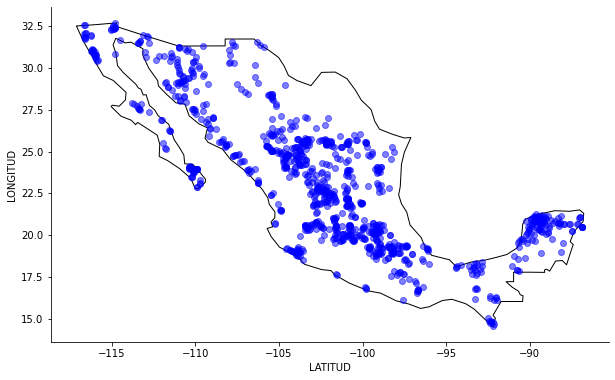

In [16]:
#En primer lugar, vamos a graficar nuestros datos en el mapa de México utilizando la libreria GEOPANDAS

#En primer lugar obtenemos las coordenadas de cada ubicacion juntando Lonfitud con Latitud
ubicacion["COORDENADAS"] = list(zip(ubicacion.LONGITUD, ubicacion.LATITUD))
ubicacion["COORDENADAS"] = ubicacion["COORDENADAS"].apply(Point)

#%%
points = gpd.GeoDataFrame(ubicacion, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

points.plot(ax=gax, color='blue', alpha = 0.5)
plt.show()

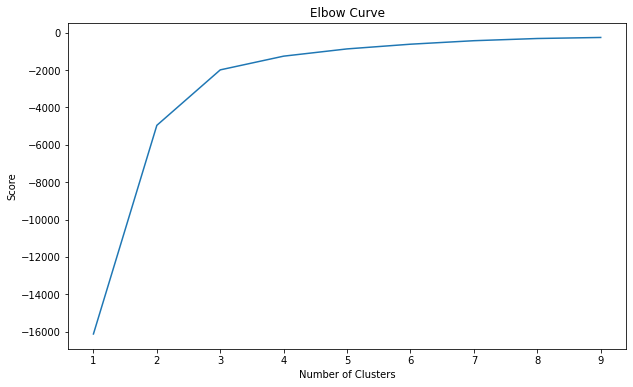

In [17]:
#Una vez que tenemos nuestro mapa, vamos a utilizar k-means para definir el numero de clusters utilizando
#ayuda visual mediante Elbow Method

from sklearn.cluster import KMeans

clusters_num = range(1,10)
mi_kmeans = [KMeans(n_clusters=i) for i in clusters_num]
Y_axis = ubicacion[['LATITUD']]
X_axis = ubicacion[['LONGITUD']]
kmeans_calc = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]
plt.figure(figsize=(10,6))
plt.plot(clusters_num, kmeans_calc)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()
#Aquí podemos definir la presencia de 3 o 4 clústers. Dado que queremos verificar la relación de calidad por ubicación
#Vamos a utilizar 4 clústers para clasificar nuestra base de datos

In [18]:
X = df[['LONGITUD', 'LATITUD']]


kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_ 
labels = kmeans.predict(X) 

C = kmeans.cluster_centers_ 

C_DF = pd.DataFrame(C) 
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #convierte en lista 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #convierte en puntos para gráficar

center_points = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
center_points

,0,1,Coordinates
0,-103.665841,24.774786,POINT (-103.66584 24.77479)
1,-90.092716,19.650263,POINT (-90.09272 19.65026)
2,-111.445371,28.734017,POINT (-111.44537 28.73402)
3,-100.228647,20.261145,POINT (-100.22865 20.26114)


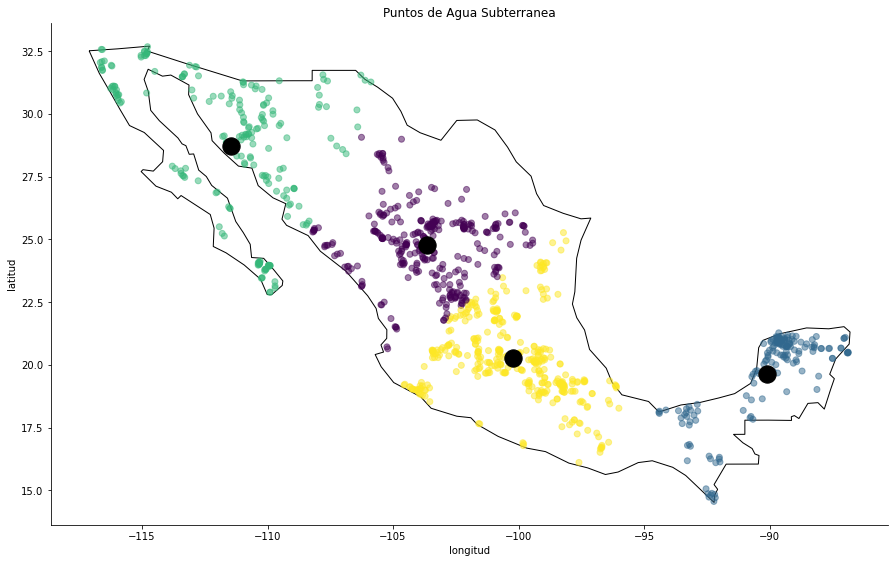

In [19]:
fig, gax = plt.subplots(figsize=(15,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') 


points.plot(ax=gax, c = labels, alpha = 0.5) #utilizando el argumento de columnas como nuestro predict, se grafica cada punto con el color del cluster al que pertenece
center_points.plot(ax=gax, color='black', alpha = 1, markersize = 300) 


gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Puntos de Agua Subterranea')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [20]:
#Una vez que hemos graficado nuestro mapa de clusters, vamos a observar si existe alguna relación entre los clusters y la calidad del agua
#Para esto utilizaremos la variable Semaforo (definida al inicio de la clusterizacion)
#Primero vamos a asignar a cada registro el cluster al que pertenece
points['cluster'] = labels
#Y añadimos el clasificador de semaforo
points['calidad'] = calidad
points['cluster'].value_counts()

3    378
0    322
2    206
1    162
Name: cluster, dtype: int64

In [21]:
#Vamos a observar cuantas categorías tenemos en Semaforo/calidad
calidad.value_counts()
#Contamos con 3 categorías

SEMAFORO
Verde       434
Rojo        387
Amarillo    247
dtype: int64

In [22]:
#Para poder visualizar mejor vamos a crear una nueva columna de estas categorias en inglés
points.loc[calidad['SEMAFORO'] == 'Verde', 'Q_color'] = 'Green'
points.loc[calidad['SEMAFORO'] == 'Rojo', 'Q_color'] = 'Red'
points.loc[calidad['SEMAFORO'] == 'Amarillo', 'Q_color'] = 'Yellow'
points['Q_color'].value_counts() #Hacemos el conteo para asegurarnos que se mantuvo la distribución después de esta transformación

Green     434
Red       387
Yellow    247
Name: Q_color, dtype: int64

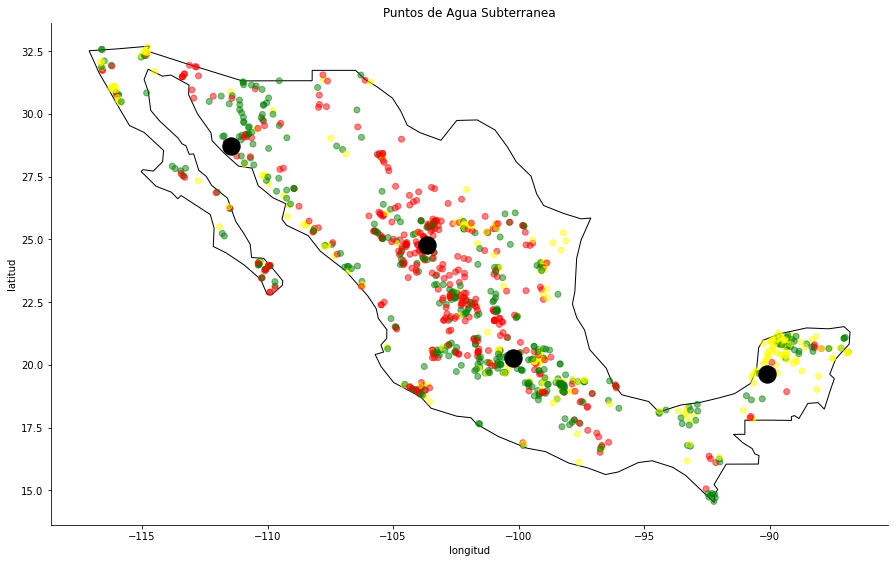

In [23]:
#Volvemos a graficar nuestros puntos con el centro de cada cluster, pero el color ya no es de cada cluster sino el color del semaforo

fig, gax = plt.subplots(figsize=(15,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') 


points.plot(ax=gax, c = points['Q_color'], alpha = 0.5) #Aqui definimos el color de cada punto de acuerdo a su semaforo
center_points.plot(ax=gax, color='black', alpha = 1, markersize = 300) 


gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Puntos de Agua Subterranea')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Tomando como referencia el primer gráfico donde se observan los puntos separados por clústers, parece que en el cluster 0 (definido por K-means) tiene una mayor cantidad de puntos con calidad de semáforo Rojo. Por su parte, el cluster 2, cuenta con mayor cantidad de puntos en semáforo amarillo; el clúster 1 con mayoría de semáforo verde y el clúster 3 repite el mismo comportamiento que el 1. 

Para poder afirmar esto debemos observar los datos y su distribución.

In [24]:
points.groupby('cluster')['calidad'].value_counts()

#Aquí se confirma lo que observamos visualmente, el clúster 0 tiene mayor cantidad de puntos con semaforo rojo (186 de 322, es decir, 58%)
#Lo mismo se repite en cada clúster que analizamos visualmente.

cluster  calidad 
0        Rojo        186
         Verde        97
         Amarillo     39
1        Amarillo     85
         Verde        63
         Rojo         14
2        Verde        94
         Rojo         65
         Amarillo     47
3        Verde       180
         Rojo        122
         Amarillo     76
Name: calidad, dtype: int64

Si bien cada clúster tiene una clase predominante de clasificación de semáforo, no podemos asegurar que existe una relación entre ubicación de los puntos y calidad. Aunque para el clúster 0, cuenta con el 48% de los puntos en semáforo rojo (total de la población). Podemos argumentar que en ese clúster predominan puntos con una menor calidad y ahí encontramos aproximadamente la mitad de estos semáforo rojo (cierta relación, pero solamente con el rojo), pero en los demás clúster/regiones no podemos dar el mismo argumento. 


---
---
---
---
---

# **Reto parte 2**

Continuando con el reto, ahora elegimos las variables independientes X y la variable dependiente Y. Es decir, X representa a todas aquellas variables que influyen en la calidad del agua; mientras que Y representa la calidad del agua con el semáforo.

In [25]:
columns = num_columns + bin_columns
X = df_clean[columns]
Y = df_clean["SEMAFORO"]

In [26]:
#Y sustituimos los valores del semáforo por números
#Rojo = 1
#Amarillo = 2
#Verde = 3

Y = Y.replace(['Rojo'], 1)
Y = Y.replace(['Amarillo'], 2)
Y = Y.replace(['Verde'], 3)

Y

0       3
1       3
2       1
3       3
4       1
       ..
1063    1
1064    1
1065    1
1066    3
1067    3
Name: SEMAFORO, Length: 1054, dtype: int64

In [27]:
#Separamos la muestra

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 101)

In [28]:
Y_train = Y_train.replace(['Rojo'], 1)
Y_train = Y_train.replace(['Amarillo'], 2)
Y_train = Y_train.replace(['Verde'], 3)

Ahora vamos con el análisis de Decision Tree

In [29]:
tree_clf = DecisionTreeClassifier(max_depth = 29, random_state = 42)
tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=29, random_state=42)

In [30]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_clf, 
                           out_file = None,
                           feature_names = columns, 
                           class_names = ['Rojo', 'Amarillo', 'Verde'], 
                           rounded = True,
                           filled = True)

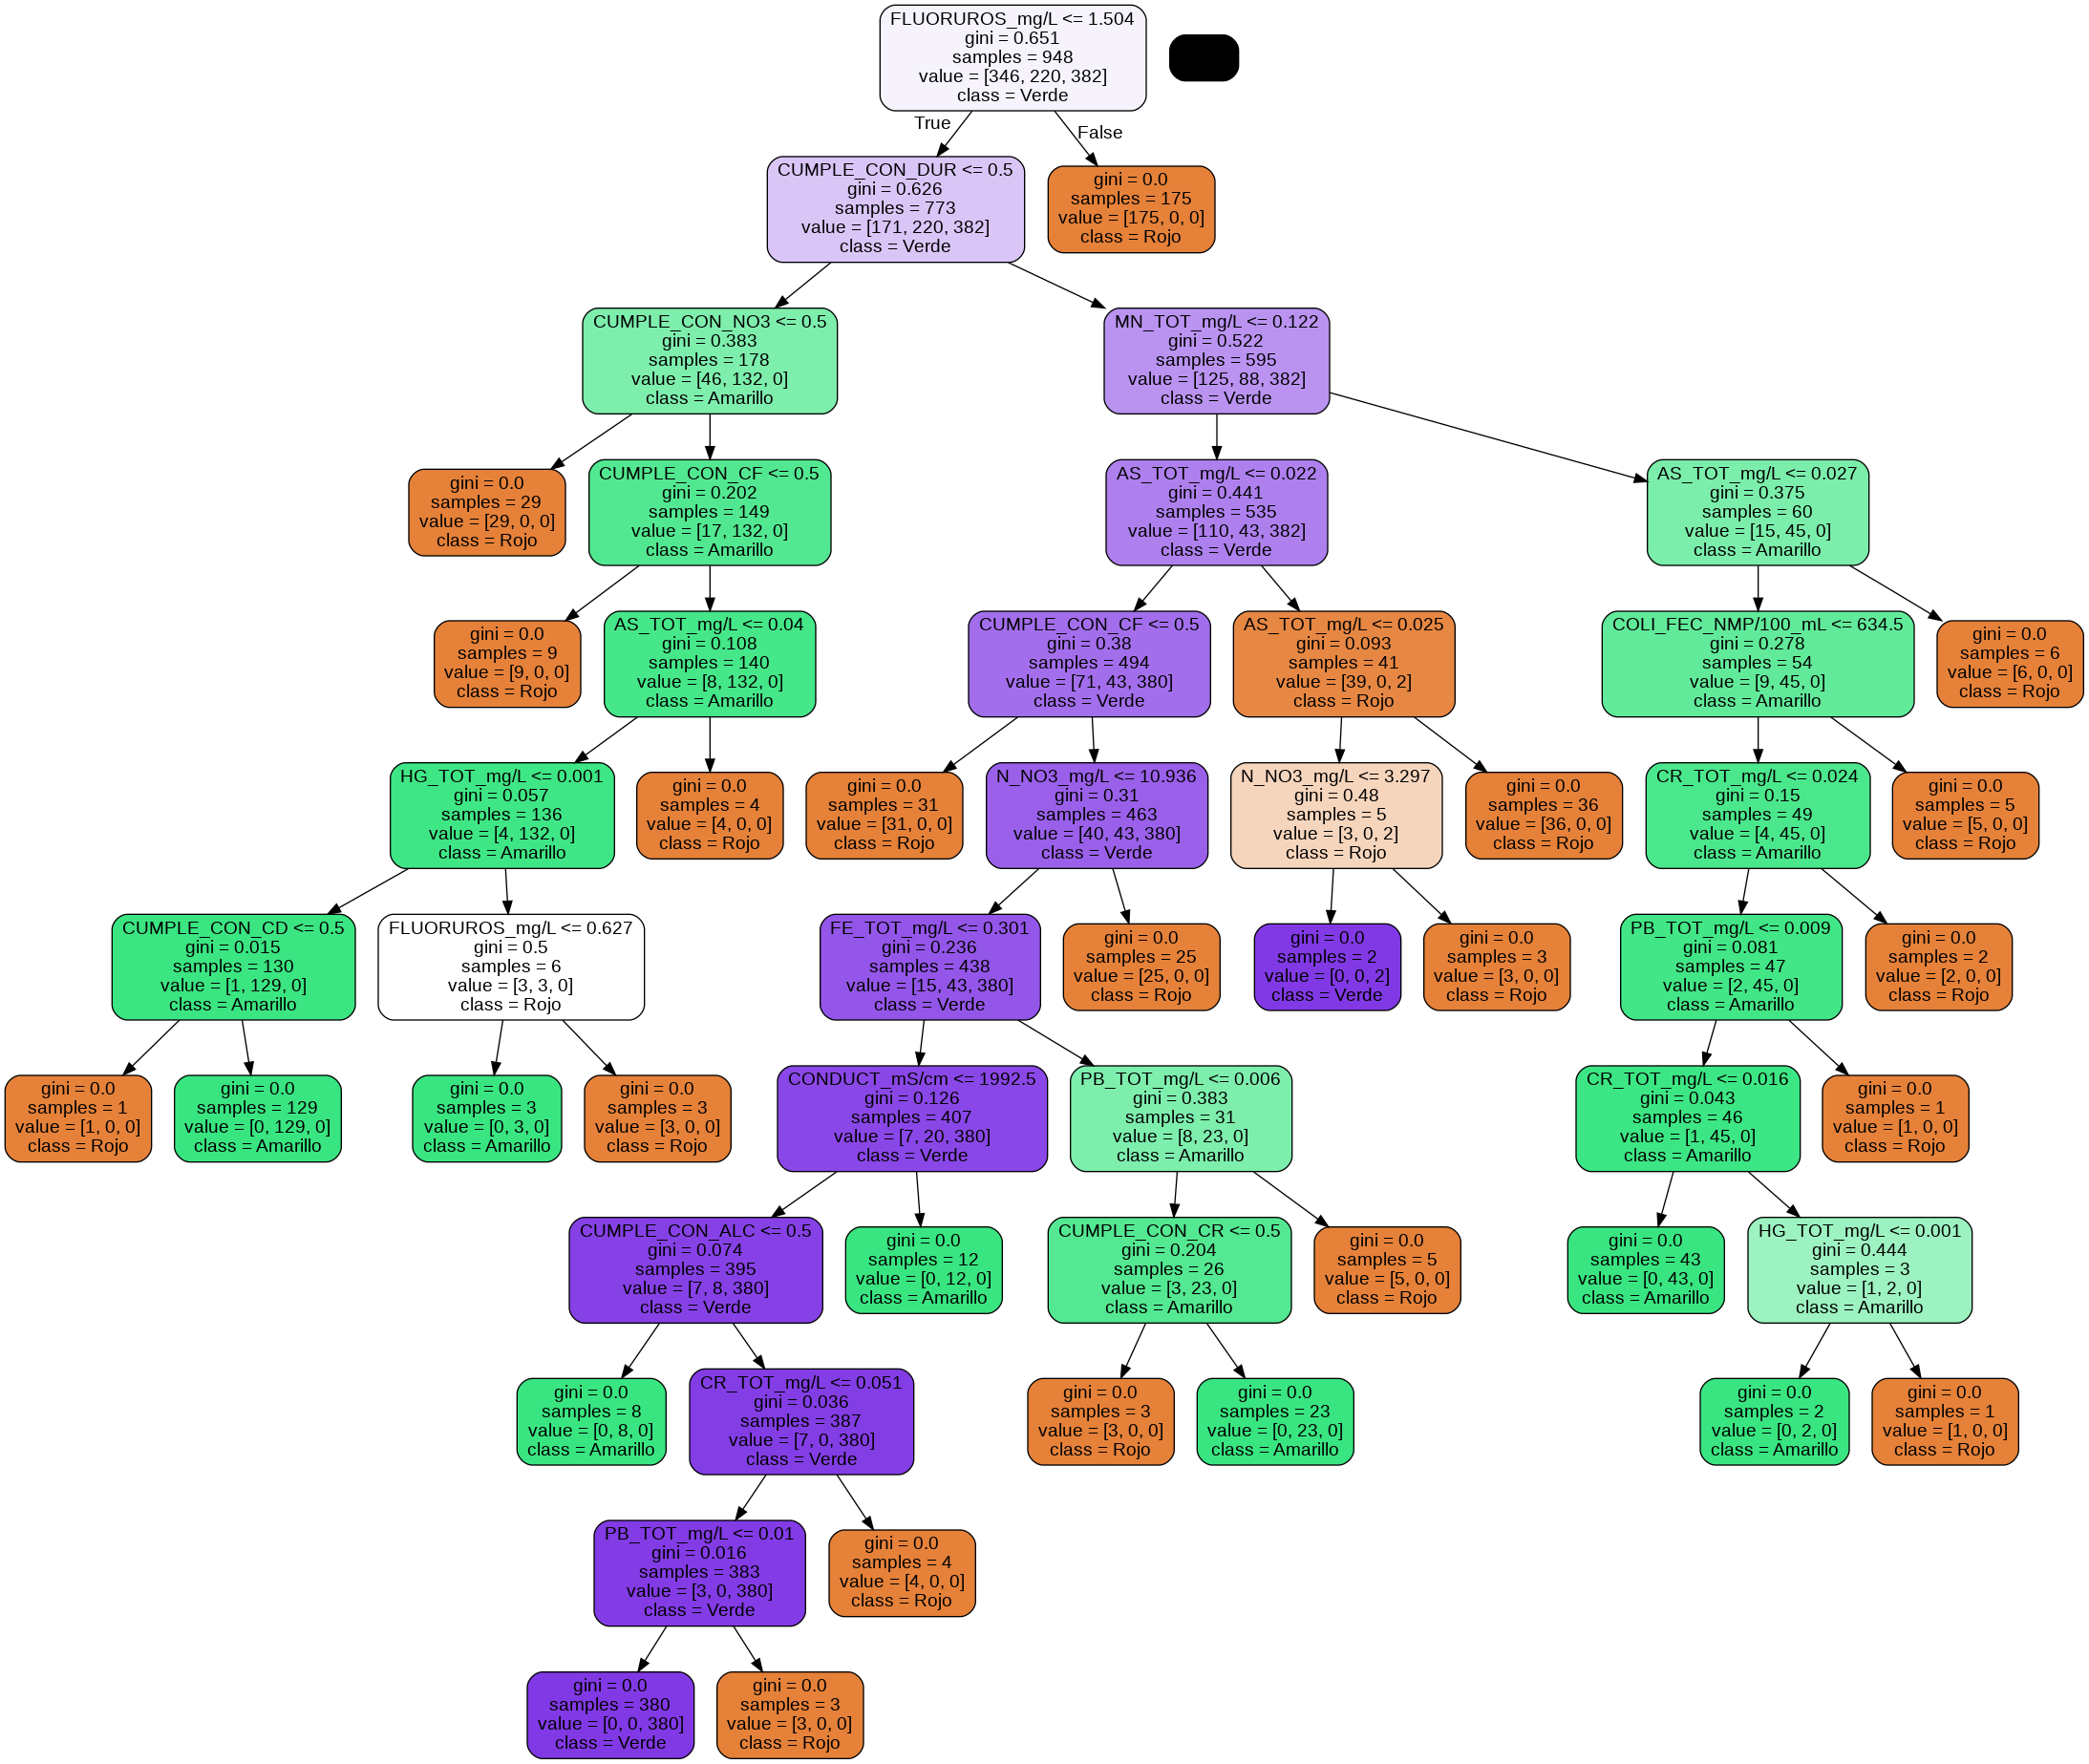

In [31]:
import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Decision_Tree.png')
Image(filename = 'Decision_Tree.png')

In [32]:
#Obtenemos las probabilidades, ahora con una row del test set:

tree_clf.predict_proba(X_test.iloc[:1, :]) #[[Rojo, Amarillo y Verde]]

array([[1., 0., 0.]])

In [33]:
#Así como la predicción:

tree_clf.predict(X_test.iloc[:1, :]) #Arroja 1 = Rojo

array([1])

In [34]:
predict1 = tree_clf.predict(X_test)
predict1

array([1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 3, 3, 2, 1, 3, 3, 2, 2, 2, 3, 2, 3,
       3, 1, 2, 1, 3, 3, 2, 3, 3, 1, 3, 3, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2,
       2, 1, 3, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 2, 1, 3,
       1, 1, 3, 3, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 1, 3, 2, 3, 2, 2, 3, 1,
       3, 3, 1, 3, 2, 3, 3, 1, 3, 3, 2, 2, 1, 2, 1, 2, 3, 1])

Y decidimos las variables de mayor importancia:

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 947 to 875
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ALC_mg/L              948 non-null    float64
 1   CONDUCT_mS/cm         948 non-null    float64
 2   SDT_M_mg/L            948 non-null    float64
 3   FLUORUROS_mg/L        948 non-null    float64
 4   DUR_mg/L              948 non-null    float64
 5   COLI_FEC_NMP/100_mL   948 non-null    float64
 6   N_NO3_mg/L            948 non-null    float64
 7   AS_TOT_mg/L           948 non-null    float64
 8   CD_TOT_mg/L           948 non-null    float64
 9   CR_TOT_mg/L           948 non-null    float64
 10  HG_TOT_mg/L           948 non-null    float64
 11  PB_TOT_mg/L           948 non-null    float64
 12  MN_TOT_mg/L           948 non-null    float64
 13  FE_TOT_mg/L           948 non-null    float64
 14  CUMPLE_CON_ALC        948 non-null    object 
 15  CUMPLE_CON_COND      

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 29)
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=29)

In [37]:
tree_reg.feature_importances_

#En este caso, las variable con mayor importancia son
#   #04, valor de 0.32028276  ---  FLUORUROS_mg/L
#   #07, valor de 0.14768809  ---  N_NO3_mg/L
#   #23, valor de 0.13766805  ---  CUMPLE_CON_P

array([0.        , 0.01628848, 0.00042673, 0.00206432, 0.        ,
       0.        , 0.        , 0.        , 0.00136562, 0.00368196,
       0.001913  , 0.00608939, 0.03171743, 0.        , 0.01078385,
       0.        , 0.        , 0.        , 0.31821845, 0.08798602,
       0.12626466, 0.14768809, 0.13766805, 0.        , 0.02175196,
       0.        , 0.01558681, 0.        , 0.07050519])

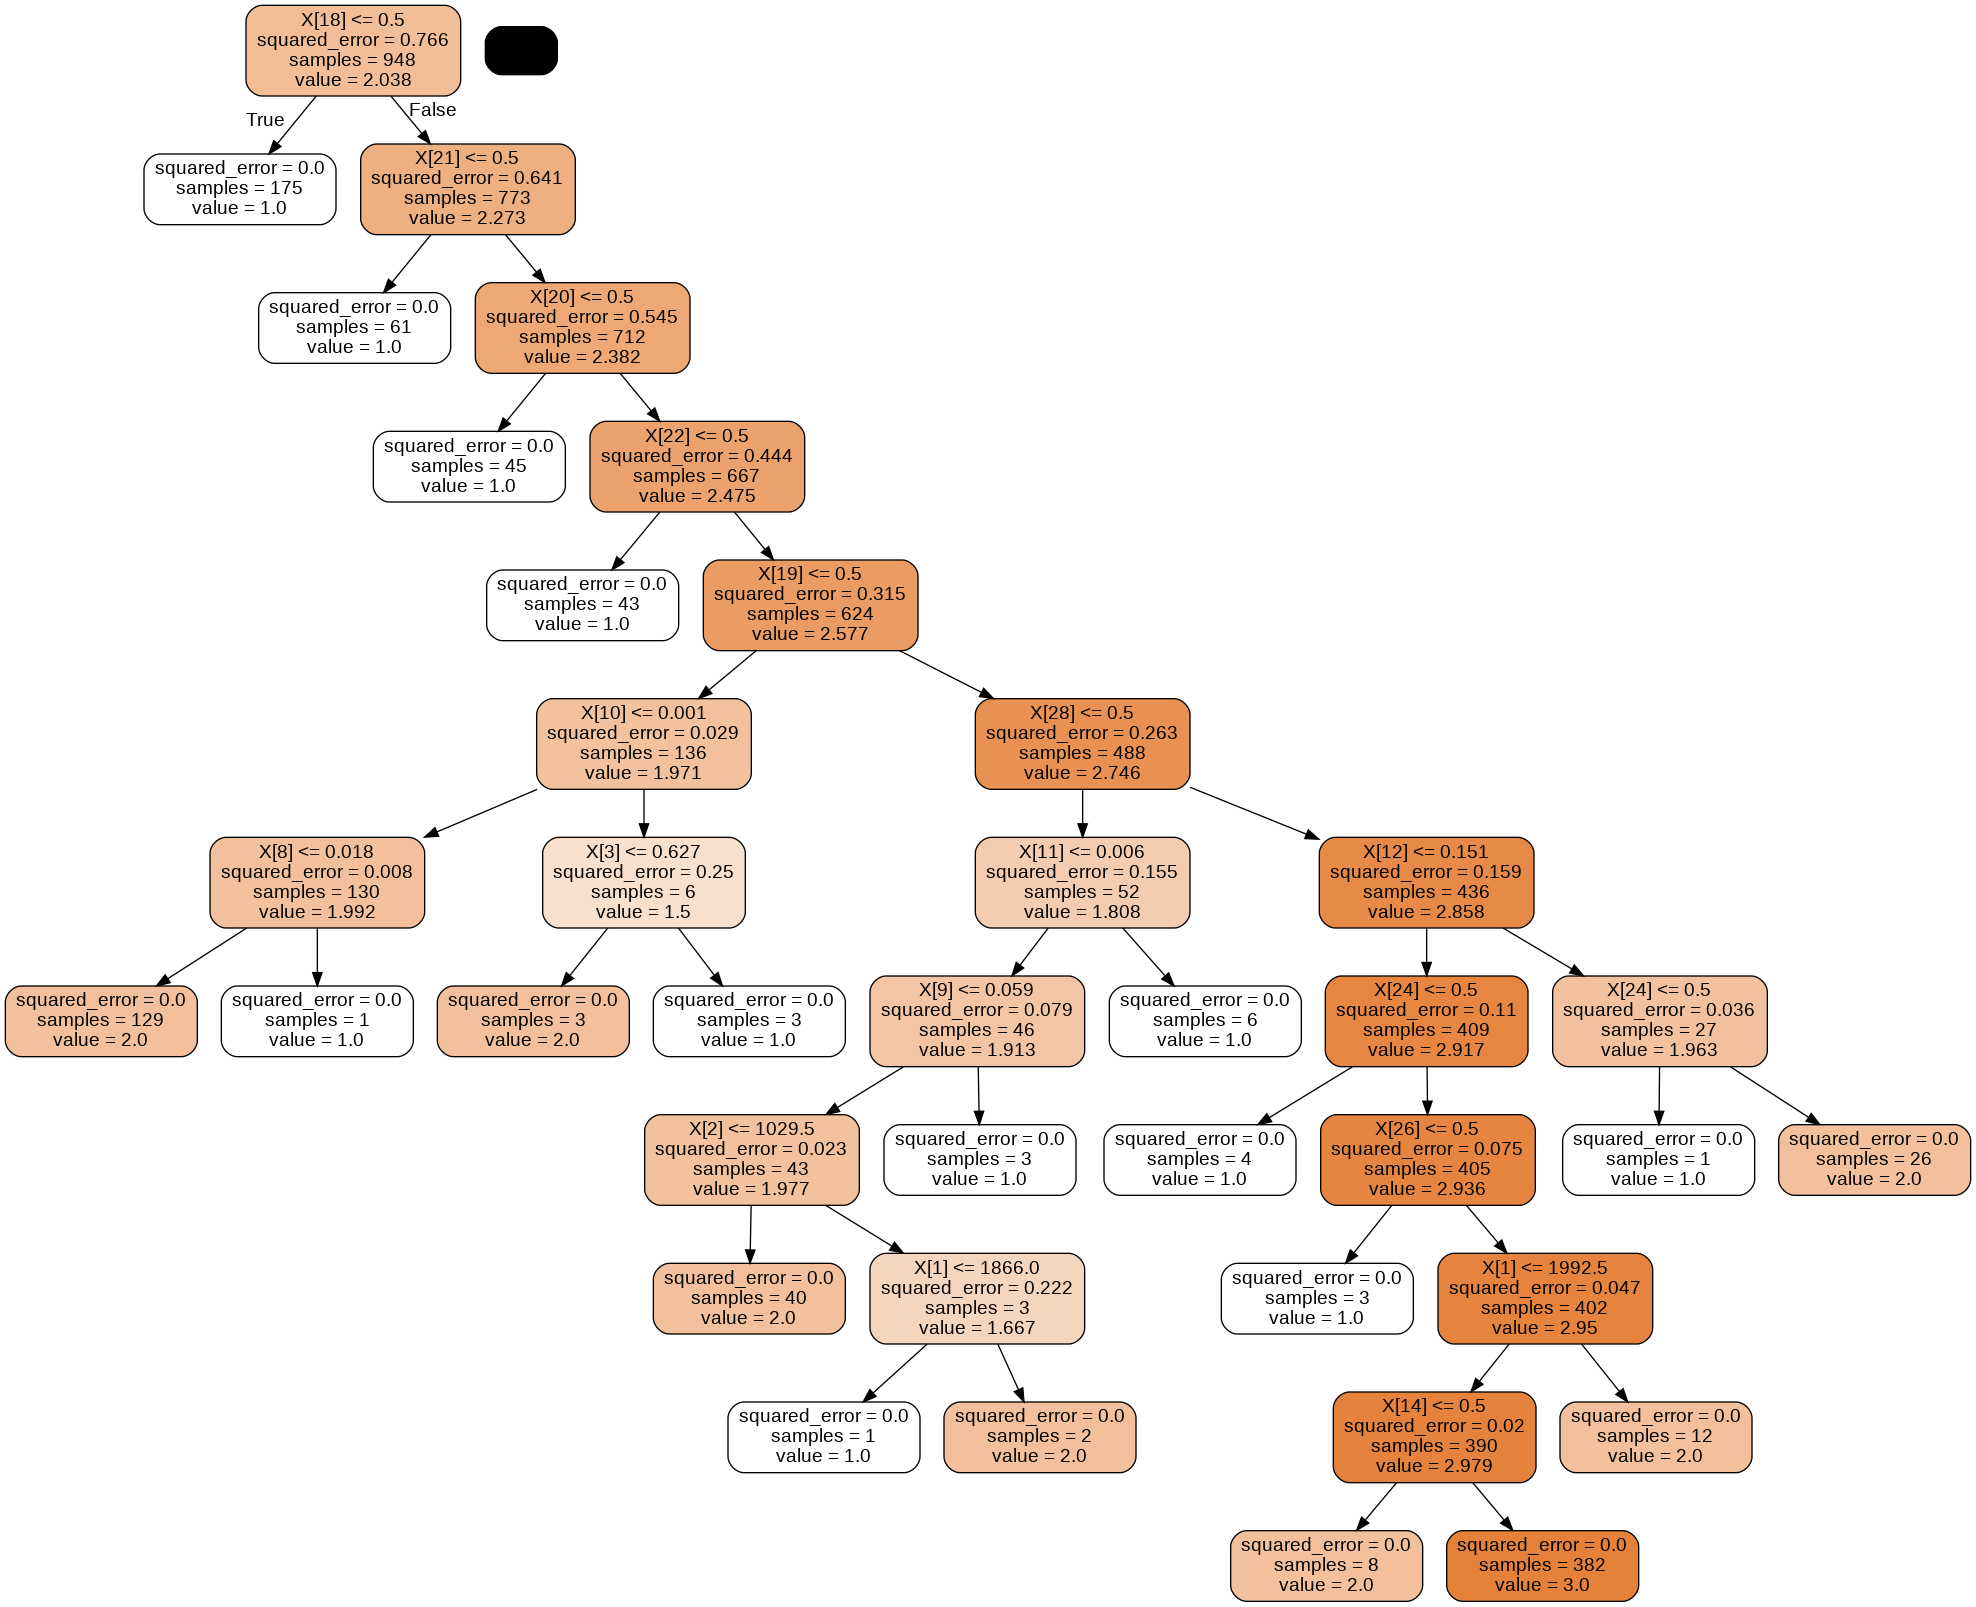

In [38]:
dot_data_reg = export_graphviz(tree_reg, 
                           out_file = None,
                           rounded = True,
                           filled = True)

graph = pydotplus.graph_from_dot_data(dot_data_reg)
graph.write_png('Decision_Tree_Reg.png')
Image(filename = 'Decision_Tree_Reg.png')

#346 samples de 948 demostraron un error del 0.0
#Es decir, el 36.49%

Ya que hemos puesto a prueba el Decision Tree, trabajaremos con un **Random Forest**.

In [39]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC

#clf_log = LogisticRegression(random_state = 40)
#clf_rnd = RandomForestClassifier(random_state = 40)
#clf_svm = SVC(random_state = 42)

#clf_voting = VotingClassifier(estimators = [('log', clf_log), ('rnd', clf_rnd), ('svm', clf_svm)],
#                              voting='hard')

#clf_voting.fit(X_train, Y_train)

#from sklearn.metrics import accuracy_score

#for clf in (clf_log, clf_rnd, clf_svm, clf_voting):
#  clf.fit(X_train, Y_train)
#  Y_pred = clf.predict(X_test)
#  print(clf.__class__.__name__, accuracy_score(Y_test, Y_pred))

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, class_weight="balanced")
rf_clf.fit(X_train, Y_train)

predict2 = rf_clf.predict(X_test)
predict2 

array([1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 3, 3, 2, 1, 3, 3, 2, 2, 2, 3, 2, 3,
       3, 1, 2, 1, 3, 3, 2, 3, 3, 1, 3, 3, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2,
       2, 1, 3, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 2, 1, 3,
       1, 1, 3, 3, 2, 3, 2, 1, 1, 3, 1, 2, 2, 3, 1, 3, 2, 3, 2, 2, 3, 1,
       3, 3, 1, 3, 2, 3, 3, 1, 3, 3, 2, 2, 1, 2, 1, 2, 3, 1])

In [41]:
#en predict2 guardamos las predicciones con base en nuestro test set
#y podemos comparar con predict1 (realizado con un solo Decision Tree)

#los resultados son casi idénticos

predict1

array([1, 2, 1, 3, 2, 3, 3, 2, 1, 3, 3, 3, 2, 1, 3, 3, 2, 2, 2, 3, 2, 3,
       3, 1, 2, 1, 3, 3, 2, 3, 3, 1, 3, 3, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2,
       2, 1, 3, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 2, 1, 3,
       1, 1, 3, 3, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 1, 3, 2, 3, 2, 2, 3, 1,
       3, 3, 1, 3, 2, 3, 3, 1, 3, 3, 2, 2, 1, 2, 1, 2, 3, 1])

Por último, corremos un **reporte de clasificación** para evaluar ambos procesos. Los cuales indican que la precisión del Decision Tree y del Random Forest es idéntica para este set de datos.

In [52]:
#Reporte del Decision Tree
from sklearn.metrics import classification_report, make_scorer

classification_report(Y_test, predict1, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=True, zero_division='warn')

{'1': {'precision': 1.0,
  'recall': 0.8888888888888888,
  'f1-score': 0.9411764705882353,
  'support': 36},
 '2': {'precision': 0.8620689655172413,
  'recall': 1.0,
  'f1-score': 0.9259259259259259,
  'support': 25},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 45},
 'accuracy': 0.9622641509433962,
 'macro avg': {'precision': 0.9540229885057471,
  'recall': 0.9629629629629629,
  'f1-score': 0.9557007988380537,
  'support': 106},
 'weighted avg': {'precision': 0.9674690956408588,
  'recall': 0.9622641509433962,
  'f1-score': 0.9625518970691002,
  'support': 106}}

In [58]:
#Reporte del Random Forest
classification_report(Y_test, predict2, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=True, zero_division='warn')

{'1': {'precision': 1.0,
  'recall': 0.9444444444444444,
  'f1-score': 0.9714285714285714,
  'support': 36},
 '2': {'precision': 0.9259259259259259,
  'recall': 1.0,
  'f1-score': 0.9615384615384615,
  'support': 25},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 45},
 'accuracy': 0.9811320754716981,
 'macro avg': {'precision': 0.9753086419753086,
  'recall': 0.9814814814814815,
  'f1-score': 0.9776556776556776,
  'support': 106},
 'weighted avg': {'precision': 0.9825296995108316,
  'recall': 0.9811320754716981,
  'f1-score': 0.9812253783951898,
  'support': 106}}

Y creamos las **matrices de confusión**:

In [49]:
#Matriz de Decision Tree
from sklearn.metrics import f1_score
f1_score(Y_test, predict1, average=None)

array([0.94117647, 0.92592593, 1.        ])

In [50]:
#Matriz de Random Forest
f1_score(Y_test, predict2, average=None)

array([0.94117647, 0.92592593, 1.        ])